# K-NN Algorithm For Classifying Diabetes Patients
Objective: Predict whether a person will be diagnosed with diabetes of not

> ## Import Required Modules

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, accuracy_score
import math

> ## Import the Dataset
The `iabetes dataset` has been downloaded from `Kaggle` datasets.

> Dataset Url: https://www.kaggle.com/mathchi/diabetes-data-set

In [31]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> ## Let's do some Exploratory Data Analysis

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [8]:
df.Glucose.unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

> There are some samples with `Glucose` level `0` which might be a missing value.

In [17]:
df.BloodPressure.unique()

array([ 72.,  66.,  64.,  40.,  74.,  50.,  70.,  96.,  92.,  80.,  60.,
        84.,  30.,  88.,  90.,  94.,  76.,  82.,  75.,  58.,  78.,  68.,
       110.,  56.,  62.,  85.,  86.,  48.,  44.,  65., 108.,  55., 122.,
        54.,  52.,  98., 104.,  95.,  46., 102., 100.,  61.,  24.,  38.,
       106., 114.])

> Also `BloodPressure` has some `0` values

In [10]:
df.SkinThickness.unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99])

> Also `SkinThickness` has some `0` values

In [11]:
df.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [12]:
df.BMI.unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [13]:
df.Age.unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

> ## Replace zeroes

In [33]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [18]:
df['Glucose'].unique()

array([148.,  85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110.,
       168., 139., 189., 166., 100., 118., 107., 103., 126.,  99., 196.,
       119., 143., 147.,  97., 145., 117., 109., 158.,  88.,  92., 122.,
       138., 102.,  90., 111., 180., 133., 106., 171., 159., 146.,  71.,
       105., 101., 176., 150.,  73., 187.,  84.,  44., 141., 114.,  95.,
       129.,  79., 121.,  62., 131., 112., 113.,  74.,  83., 136.,  80.,
       123.,  81., 134., 142., 144.,  93., 163., 151.,  96., 155.,  76.,
       160., 124., 162., 132., 120., 173., 170., 128., 108., 154.,  57.,
       156., 153., 188., 152., 104.,  87.,  75., 179., 130., 194., 181.,
       135., 184., 140., 177., 164.,  91., 165.,  86., 193., 191., 161.,
       167.,  77., 182., 157., 178.,  61.,  98., 127.,  82.,  72., 172.,
        94., 175., 195.,  68., 186., 198.,  67., 174., 199.,  56., 169.,
       149.,  65., 190.])

> ## Before proceeding further, let's split the dataset into train and test

In [34]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> ## Feature Scaling

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

> ## KNN Classifier
Now define the model using `KNeighborsClassifier` and fit the train data in the model

In [36]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [37]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

> ## Evaluate the Model

In [38]:
y_pred = clf.predict(X_test)

Confusion matirx: 
 [[94 13]
 [15 32]]
f1 Score:  0.6956521739130436


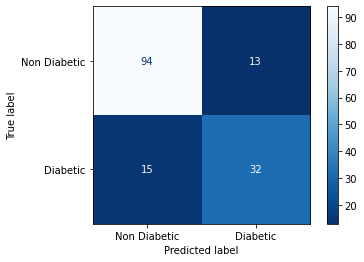

In [39]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matirx: \n', cm)
score = f1_score(y_test, y_pred)
print('f1 Score: ', score)
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Non Diabetic', 'Diabetic'], cmap='Blues_r')

In [40]:
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc_score)

Accuracy Score:  0.8181818181818182
